In [1]:
import requests
import os
import json

# API base URL and token
BASE_URL = "https://renforce.esapro.it/api"
API_TOKEN = "2c23937283ed6125f52c4ba7399c7baebdfb3f051ac9272550847066011d7d5a83807bb0c3c807e2450fcb7fd4843d126badcf4c3f0ee52ca548b43db77e100e48becf05cb5e93529564055dd8a85d9beb089420a91eec2a022fbf8f984d9138a26afc5296e60aed14024c60ddcb95dff130b3f9fb7af13598a48dbc62348389"

# Plant code
PLANT_CODE = "P1130"
RESOLUTION=1

# Headers for authentication
HEADERS = {
    "X-API-Token": API_TOKEN
}

# Function to retrieve plant configurations
def get_plant_configurations(plant_code):
    """
    Retrieves the plant configurations from the API.

    Args:
        plant_code (str): The plant code.

    Returns:
        dict: The API response as a dictionary.
    """
    url = f"{BASE_URL}/{plant_code}/config"
    response = requests.get(url, headers=HEADERS)
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception(f"Failed to retrieve configurations: {response.status_code}, {response.text}")

# Main execution
try:
    # Retrieve configurations
    configurations = get_plant_configurations(PLANT_CODE)

    # Print the response on the screen with better formatting
    print("\nAPI Response:")
    print("=" * 40)
    for config in configurations:
        for key, value in config.items():
            print(f"{key}: {value}")
        print("-" * 40)

    # Save the response to a file
    base_dir = "Data"
    os.makedirs(base_dir, exist_ok=True)
    file_path = os.path.join(base_dir, f"{PLANT_CODE}_configurations.json")
    with open(file_path, "w", encoding="utf-8") as file:
        json.dump(configurations, file, indent=4)
    print(f"\nConfigurations saved to: {file_path}")

    # Create a constant variable for the version
    VERSION = configurations[-1].get("v", "N/A")  # Assuming the version is in the first configuration
    print(f"\nVERSION constant created: {VERSION}")

except Exception as e:
    print("Error:", e)


API Response:
v: 1
t: 1980-01-01 00:00:00
----------------------------------------

Configurations saved to: Data/P1130_configurations.json

VERSION constant created: 1


In [2]:
import requests
import os
import csv
import json

def get_blocks(plant_code, config_version, block_types=None):
    """
    Retrieves a list of blocks (devices) from a specific plant configuration.

    Args:
        plant_code (str): The plant code (e.g., "P1234").
        config_version (int): Configuration identifier.
        block_types (str or list, optional): Type(s) of blocks to filter (e.g., "INVERTER" or ["COUNTER", "INVERTER"]).

    Returns:
        list: Array of block objects representing devices in the plant.
    """
    url = f"{BASE_URL}/{plant_code}/blocks/{config_version}"
    params = {}
    if block_types:
        params["type"] = block_types if isinstance(block_types, str) else ",".join(block_types)
    
    try:
        response = requests.get(url, headers=HEADERS, params=params)
        if response.status_code == 200:
            return response.json()
        else:
            print("Response Status Code:", response.status_code)
            print("Response Text:", response.text)
            raise Exception(f"Failed to retrieve blocks: {response.status_code}, {response.text}")
    except requests.exceptions.RequestException as e:
        raise Exception(f"An error occurred while making the request: {e}")

def save_blocks_to_csv(plant_code, blocks):
    """
    Saves the blocks to a CSV file in the specified directory structure.

    Args:
        plant_code (str): The plant code.
        blocks (list): List of block objects.
    """
    # Define the directory structure
    base_dir = "Data"
    plant_dir = os.path.join(base_dir, plant_code)

    # Create directories if they don't exist
    os.makedirs(plant_dir, exist_ok=True)

    # Define the CSV file path
    csv_file_path = os.path.join(plant_dir, f"{plant_code}_blocks.csv")

    # Write blocks to the CSV file
    with open(csv_file_path, mode="w", newline="", encoding="utf-8") as csv_file:
        writer = csv.writer(csv_file)
        # Write the header
        writer.writerow(["ID", "Name", "Type", "Description", "OID", "Properties", "Sensors", "Visible", "Enabled"])
        # Write the data
        for block in blocks:
            writer.writerow([
                block.get("id", "N/A"),
                block.get("name", "N/A"),
                block.get("type", "N/A"),
                block.get("desc", "N/A"),
                block.get("oid", "N/A"),
                block.get("props", "N/A"),
                block.get("sens", "N/A"),
                block.get("visible", "N/A"),
                block.get("enabled", "N/A")
            ])

    print(f"Blocks saved to: {csv_file_path}")

def print_blocks(blocks):
    """
    Prints the blocks nicely on the screen.

    Args:
        blocks (list): List of block objects.
    """
    print("\nBlocks List:")
    for block in blocks:
        print(f"ID: {block.get('id', 'N/A')}")
        print(f"Name: {block.get('name', 'N/A')}")
        print(f"Type: {block.get('type', 'N/A')}")
        print(f"Description: {block.get('desc', 'N/A')}")
        print(f"OID: {block.get('oid', 'N/A')}")
        print(f"Properties: {block.get('props', 'N/A')}")
        print(f"Sensors: {block.get('sens', 'N/A')}")
        print(f"Visible: {block.get('visible', 'N/A')}")
        print(f"Enabled: {block.get('enabled', 'N/A')}")
        print("-" * 40)  # Separator for readability

# Main execution
try:
    # Retrieve blocks
    blocks = get_blocks(PLANT_CODE, VERSION)

    # Print blocks nicely
    print_blocks(blocks)

    # Save blocks to CSV
    save_blocks_to_csv(PLANT_CODE, blocks)

except Exception as e:
    print("Error:", e)


Blocks List:
ID: 1
Name: P1130
Type: PLANT
Description: P1130 Collection
OID: 1
Properties: {'alarm_check_timerange': '10:00 - 14:00', 'alarm_irradiance_threshold': '100', 'avoid_night_oos': '0', 'capacity': '4103.2', 'contractual_irr_link': '', 'delivery_period': '30', 'energy_alerts': '0', 'field_alarm_ttl': '10', 'field_data_ttl': '10', 'irr_link.0': '171', 'sunrise_o': '0', 'sunset_o': '0', 'sys_loss': '0.05', 'temp_link.0': '173', 'up_inverter_thld': '0.9', 'up_irr_thld': '600', 'up_irrsd_thld': '0.05', 'up_jbox_thld': '0.9', 'user_irr_link': '', 'user_temp_link': ''}
Sensors: ['J44', 'J30', 'J101', 'J7', 'J34', 'J33', 'J31', 'J1', 'J104', 'J4', 'J102']
Visible: True
Enabled: True
----------------------------------------
ID: 17
Name: Cabina 01
Type: AGGREGATE
Description: 
OID: 1.1
Properties: {'aggr_stop': '1', 'alarm_irradiance_filter': '0', 'capacity': '1370.8', 'context': '', 'irr_link.0': '171', 'minor_aggr': '0', 'temp_link.0': '173', 'user_irr_link': '', 'user_temp_link': 

In [3]:
import requests
import os
import csv


def get_sensors(plant_code, config_version, sensor_types=None):
    """
    Retrieves a list of sensors from a specific plant configuration.

    Args:
        plant_code (str): The plant code (e.g., "P1234").
        config_version (int): Configuration identifier.
        sensor_types (str or list, optional): Type(s) of sensors to filter (e.g., "AC_ACTIVE_ENERGY" or ["AC_ACTIVE_ENERGY", "MODULE_SOLAR_IRRADIANCE"]).

    Returns:
        list: Array of sensor objects.
    """
    url = f"{BASE_URL}/{plant_code}/sensors/{config_version}"
    params = {}
    if sensor_types:
        params["type"] = sensor_types if isinstance(sensor_types, str) else ",".join(sensor_types)
    
    try:
        response = requests.get(url, headers=HEADERS, params=params)
        if response.status_code == 200:
            return response.json()
        else:
            print("Response Status Code:", response.status_code)
            print("Response Text:", response.text)
            raise Exception(f"Failed to retrieve sensors: {response.status_code}, {response.text}")
    except requests.exceptions.RequestException as e:
        raise Exception(f"An error occurred while making the request: {e}")

def save_sensors_to_csv(plant_code, sensors):
    """
    Saves the sensors to a CSV file in the specified directory structure.

    Args:
        plant_code (str): The plant code.
        sensors (list): List of sensor objects.
    """
    # Define the directory structure
    base_dir = "Data"
    plant_dir = os.path.join(base_dir, plant_code)

    # Create directories if they don't exist
    os.makedirs(plant_dir, exist_ok=True)

    # Define the CSV file path
    csv_file_path = os.path.join(plant_dir, f"{plant_code}_sensors.csv")

    # Write sensors to the CSV file
    with open(csv_file_path, mode="w", newline="", encoding="utf-8") as csv_file:
        writer = csv.writer(csv_file)
        # Write the header
        writer.writerow(["ID", "Name", "Type", "Description", "OID", "Properties", "Source", "Visible", "Enabled"])
        # Write the data
        for sensor in sensors:
            writer.writerow([
                sensor.get("id", "N/A"),
                sensor.get("name", "N/A"),
                sensor.get("type", "N/A"),
                sensor.get("desc", "N/A"),
                sensor.get("oid", "N/A"),
                sensor.get("props", "N/A"),
                sensor.get("source", "N/A"),
                sensor.get("visible", "N/A"),
                sensor.get("enabled", "N/A")
            ])

    print(f"Sensors saved to: {csv_file_path}")

def print_sensors(sensors):
    """
    Prints the sensors nicely on the screen.

    Args:
        sensors (list): List of sensor objects.
    """
    print("\nSensors List:")
    for sensor in sensors:
        print(f"ID: {sensor.get('id', 'N/A')}")
        print(f"Name: {sensor.get('name', 'N/A')}")
        print(f"Type: {sensor.get('type', 'N/A')}")
        print(f"Description: {sensor.get('desc', 'N/A')}")
        print(f"OID: {sensor.get('oid', 'N/A')}")
        print(f"Properties: {sensor.get('props', 'N/A')}")
        print(f"Source: {sensor.get('source', 'N/A')}")
        print(f"Visible: {sensor.get('visible', 'N/A')}")
        print(f"Enabled: {sensor.get('enabled', 'N/A')}")
        print("-" * 40)  # Separator for readability

# Main execution
try:
    plant_code = PLANT_CODE  # Plant code
    config_version = VERSION       # Configuration version
    sensor_types = None      # Retrieve all sensor types

    # Retrieve sensors
    sensors = get_sensors(plant_code, config_version, sensor_types)
    print(len(sensors), "sensors found")
    # Print sensors nicely
    print_sensors(sensors)

    # Save sensors to CSV
    save_sensors_to_csv(plant_code, sensors)
except Exception as e:
    print("Error:", e)

3572 sensors found

Sensors List:
ID: 1
Name: Voltage L1
Type: VOLTAGE
Description: 
OID: 1.1.14:1
Properties: {'alarm_c': '5', 'alarm_debounce': '60', 'alarm_function': '', 'alarm_max_threshold': '0', 'alarm_min_threshold': '0', 'alarm_tdc': '60', 'alarm_tdo': '60', 'alarm_type': '', 'cast': 'U32', 'endian': 'BE', 'is_raw': '1', 'limit_max': '', 'limit_min': '', 'register': '3c552', 'sampling_period': '300'}
Source: sundra
Visible: True
Enabled: True
----------------------------------------
ID: 10
Name: Temperature
Type: TEMPERATURE
Description: 
OID: 1.1.1.1:10
Properties: {'alarm_c': '3', 'alarm_debounce': '300', 'alarm_function': 'LIMITALARM', 'alarm_max_threshold': '70', 'alarm_min_threshold': '-10', 'alarm_tdc': '300', 'alarm_tdo': '300', 'alarm_type': '52', 'c_high_pass': '', 'c_low_pass': '', 'cast': 'U16', 'copy_to': '', 'data_age_lmt': '0', 'endian': 'BE', 'is_raw': '1', 'limit_max': '', 'limit_min': '', 'mask': '', 'mask_value': '1', 'register': '31064', 'sampling_period': '

# Finds how long the data timeline goes for the energy production

In [5]:
import pandas as pd


# Path to the sensors file
SENSORS_FILE = f"Data/{PLANT_CODE}/{PLANT_CODE}_sensors.csv"

# Step 1: Load the sensors file
try:
    sensors_metadata = pd.read_csv(SENSORS_FILE)
except FileNotFoundError:
    print(f"File not found: {SENSORS_FILE}")
    exit()  # Ensure the program exits here to avoid further execution

# Step 2: Find the sensor with the name "Energia Prodotta" or "Energy AC DELTA"
if "Name" not in sensors_metadata.columns:
    print("The 'Name' column is missing in the sensors metadata.")
    exit()

sensor_row = sensors_metadata[sensors_metadata["Name"].str.contains("Energia Prodotta", case=False, na=False)]
if sensor_row.empty:
    sensor_row = sensors_metadata[sensors_metadata["Name"].str.contains("Energy AC DELTA", case=False, na=False)]
    if sensor_row.empty:
        print("Sensor with the name 'Energia Prodotta' or 'Energy AC DELTA' not found.")
        exit()

sensor_id = sensor_row.iloc[0]["ID"]
print(f"Sensor ID for the found sensor: {sensor_id}")
import pandas as pd
from datetime import datetime, timedelta
import requests
import time

# Path to the sensors file
SENSORS_FILE = f"Data/{PLANT_CODE}/{PLANT_CODE}_sensors.csv"

# Step 1: Load the sensors file
try:
    sensors_metadata = pd.read_csv(SENSORS_FILE)
except FileNotFoundError:
    print(f"File not found: {SENSORS_FILE}")
    exit()

# Step 2: Find the sensor with the name "Energia Prodotta" or "Energy AC DELTA"
if "Name" not in sensors_metadata.columns:
    print("The 'Name' column is missing in the sensors metadata.")
    exit()

sensor_row = sensors_metadata[sensors_metadata["Name"].str.contains("Energia Prodotta", case=False, na=False)]
if sensor_row.empty:
    sensor_row = sensors_metadata[sensors_metadata["Name"].str.contains("Energy AC DELTA", case=False, na=False)]
    if sensor_row.empty:
        print("Sensor with the name 'Energia Prodotta' or 'Energy AC DELTA' not found.")
        exit()

sensor_id = sensor_row.iloc[0]["ID"]
print(f"Sensor ID for the found sensor: {sensor_id}")

# Step 3: Retrieve data for the sensor
TREND_URL = f"{BASE_URL}/{PLANT_CODE}/data/trend/"
end_date = datetime.now().replace(minute=0, second=0, microsecond=0)  # Round down to the nearest full hour
max_interval = timedelta(days=92)  # Maximum allowed interval (92 days)
no_data_threshold = timedelta(days=365)  # Stop if no data is returned for more than 1 year

current_end = end_date
last_reading = None
no_data_duration = timedelta(0)

while no_data_duration < no_data_threshold:
    current_start = current_end - max_interval
    payload = {
        "from": current_start.strftime("%Y-%m-%d %H:%M:%S"),
        "to": current_end.strftime("%Y-%m-%d %H:%M:%S"),
        "sensors": [sensor_id],
        "resolution": RESOLUTION
    }

    # Make the POST request to the API
    response = requests.post(TREND_URL, headers=HEADERS, json=payload)

    if response.status_code == 200:
        try:
            data = response.json()
        except ValueError:
            print("Failed to parse JSON response.")
            break

        # Check if data is returned for the sensor
        if str(sensor_id) in data and data[str(sensor_id)]:
            sensor_data = data[str(sensor_id)]
            sensor_df = pd.DataFrame(sensor_data, columns=["timestamp", "value"])
            sensor_df["timestamp"] = pd.to_datetime(sensor_df["timestamp"])  # Ensure timestamp is datetime

            # Update the last reading to the minimum timestamp in this range
            last_reading = sensor_df["timestamp"].min()

            print(f"Data retrieved for range {current_start} to {current_end}.")
            no_data_duration = timedelta(0)  # Reset no data duration
            del sensor_df  # Clear memory
        else:
            print(f"No data for sensor {sensor_id} in range {current_start} to {current_end}.")
            no_data_duration += max_interval  # Increment no data duration
    else:
        print(f"Failed to fetch trend data. HTTP Status Code: {response.status_code}")
        print("Response:", response.text)
        break

    # Move to the previous time range
    current_end = current_start - timedelta(seconds=1)
    time.sleep(1)  # Avoid hitting API rate limits

# Step 4: Save the last reading going backward
if last_reading:
    last_day = last_reading.date()
    print(f"The last day of data for the sensor going backward is: {last_day}")
else:
    print("No data found for the sensor.")

Sensor ID for the found sensor: 156
Sensor ID for the found sensor: 156
Data retrieved for range 2025-03-19 18:00:00 to 2025-06-19 18:00:00.
Data retrieved for range 2024-12-17 17:59:59 to 2025-03-19 17:59:59.
Data retrieved for range 2024-09-16 17:59:58 to 2024-12-17 17:59:58.
Data retrieved for range 2024-06-16 17:59:57 to 2024-09-16 17:59:57.
Data retrieved for range 2024-03-16 17:59:56 to 2024-06-16 17:59:56.
Data retrieved for range 2023-12-15 17:59:55 to 2024-03-16 17:59:55.
Data retrieved for range 2023-09-14 17:59:54 to 2023-12-15 17:59:54.
Data retrieved for range 2023-06-14 17:59:53 to 2023-09-14 17:59:53.
Data retrieved for range 2023-03-14 17:59:52 to 2023-06-14 17:59:52.
Data retrieved for range 2022-12-12 17:59:51 to 2023-03-14 17:59:51.
Data retrieved for range 2022-09-11 17:59:50 to 2022-12-12 17:59:50.
Data retrieved for range 2022-06-11 17:59:49 to 2022-09-11 17:59:49.
Data retrieved for range 2022-03-11 17:59:48 to 2022-06-11 17:59:48.
No data for sensor 156 in range

The code under retrieves all the sensors, and specifies which sensors actually have data

In [100]:
# import requests
# import pandas as pd
# import time
# import os
# from datetime import datetime, timedelta

# # API endpoint URLs
# TREND_URL = f"{BASE_URL}/{PLANT_CODE}/data/trend/"
# SENSORS_URL = f"{BASE_URL}/{PLANT_CODE}/sensors/{config_version}"

# # Function to save sensors with data (ID and Name) to a CSV file
# def save_sensors_with_data(plant_code, sensors_with_data, sensors_metadata):
#     """
#     Saves the list of sensors with data (ID and Name) to a CSV file in the specified directory structure.

#     Args:
#         plant_code (str): The plant code.
#         sensors_with_data (list): List of sensor IDs with data.
#         sensors_metadata (pd.DataFrame): DataFrame containing sensor metadata.
#     """
#     # Define the directory structure
#     base_dir = "Data"
#     plant_dir = os.path.join(base_dir, plant_code)

#     # Create directories if they don't exist
#     os.makedirs(plant_dir, exist_ok=True)

#     # Define the CSV file path
#     csv_file_path = os.path.join(plant_dir, f"{plant_code}_sensors_with_data.csv")

#     # Filter metadata to include only sensors with data
#     matching_sensors = sensors_metadata[sensors_metadata["id"].isin(sensors_with_data)]  # Use "id" instead of "ID"

#     # Save the matching sensors (ID and Name) to the CSV file
#     matching_sensors[["id", "name"]].to_csv(csv_file_path, index=False)  # Use "id" and "name" columns

#     print(f"Sensors with data saved to: {csv_file_path}")

# # Fetch the list of sensors
# response_sensors = requests.get(SENSORS_URL, headers=HEADERS)

# if response_sensors.status_code == 200:
#     # Parse the JSON response to get the list of sensors
#     sensors_data = response_sensors.json()
#     sensors_metadata = pd.DataFrame(sensors_data)  # Convert sensor metadata to a DataFrame
#     sensor_ids = sensors_metadata["id"].tolist()  # Get all sensor IDs
#     print(f"Total sensor IDs: {len(sensor_ids)}")
    
#     # Use the last_day from the previous code as the start_date
#     try:
#         # Use the last_day from the previous code as the start_date
#         start_date = datetime.combine(last_day, datetime.min.time())  # Convert last_day (date) to datetime
#     except FileNotFoundError:
#         print("No previous last_day found. Using default start date.")
#         start_date = datetime(2025, 4, 15, 0, 0, 0)  # Default start date

#     # Define the end date dynamically as yesterday
#     end_date = datetime.now() - timedelta(days=1)  # Yesterday's date
#     end_date = end_date.replace(hour=23, minute=59, second=59)  # Set to the end of the day

#     # Define maximum time ranges for each resolution
#     resolution_max_intervals = {
#         0: timedelta(days=92),    # 15-minute resolution
#         1: timedelta(days=368),   # Hourly resolution
#         2: timedelta(days=7300),  # Daily resolution
#         3: timedelta(days=7300),  # Monthly resolution
#         4: timedelta(days=7300)   # Yearly resolution
#     }

#     # Get the maximum interval for the selected resolution
#     max_interval = resolution_max_intervals.get(RESOLUTION, timedelta(days=92))  # Default to 92 days if resolution is unknown

#     # Split the time range into chunks of the maximum interval
#     time_ranges = []
#     current_start = start_date
#     while current_start < end_date:
#         current_end = min(current_start + max_interval, end_date)
#         time_ranges.append((current_start, current_end))
#         current_start = current_end + timedelta(seconds=1)  # Avoid overlapping intervals

#     # Split sensor IDs into batches of 25 sensors per batch
#     batch_size = 25
#     sensor_batches = [sensor_ids[i:i + batch_size] for i in range(0, len(sensor_ids), batch_size)]

#     # Initialize an empty DataFrame
#     df = pd.DataFrame()

#     # List to track sensors with data
#     sensors_with_data = []

#     # Loop through each time range and batch of sensors
#     for time_idx, (start_time, end_time) in enumerate(time_ranges):
#         print(f"Processing time range {time_idx + 1}: {start_time} to {end_time}")
#         for batch_idx, batch in enumerate(sensor_batches):
#             print(f"Processing batch {batch_idx + 1} with sensors: {batch}")
#             payload = {
#                 "from": start_time.strftime("%Y-%m-%d %H:%M:%S"),
#                 "to": end_time.strftime("%Y-%m-%d %H:%M:%S"),
#                 "sensors": batch,
#                 "resolution": RESOLUTION  # Use the selected resolution
#             }

#             # Make the POST request to the API
#             response = requests.post(TREND_URL, headers=HEADERS, json=payload)

#             if response.status_code == 200:
#                 # Parse the JSON response
#                 data = response.json()

#                 # Track sensors with no data
#                 no_data_sensors = []

#                 # Transform the data into a DataFrame
#                 for sensor_id, sensor_data in data.items():
#                     if not sensor_data:
#                         no_data_sensors.append(sensor_id)  # Log sensors with no data
#                         continue
#                     sensors_with_data.append(sensor_id)  # Add sensor to the list of sensors with data
#                     sensor_df = pd.DataFrame(sensor_data, columns=["timestamp", sensor_id])
#                     sensor_df["timestamp"] = pd.to_datetime(sensor_df["timestamp"])  # Ensure timestamp is datetime
#                     if df.empty:
#                         df = sensor_df
#                     else:
#                         df = pd.merge(df, sensor_df, on="timestamp", how="outer")  # Merge on timestamp

#                 # Log sensors with no data for this batch
#                 if no_data_sensors:
#                     print(f"No data returned for sensors in batch {batch_idx + 1}: {', '.join(map(str, no_data_sensors))}")
#                 else:
#                     print(f"All sensors in batch {batch_idx + 1} have data.")
#             else:
#                 print(f"Failed to fetch trend data for batch {batch_idx + 1}. HTTP Status Code: {response.status_code}")
#                 print("Response:", response.text)

#             # Respect the API rate limit (no more than 5 calls per minute)
#             time.sleep(12)  # Wait 12 seconds between calls to stay under the limit

#     # Remove duplicates from the list of sensors with data
#     sensors_with_data = list(set(sensors_with_data))
#     # Display the DataFrame
#     print("DataFrame:")
#     print(df.head())
    
#     # Display the list of sensors with data
#     print("\nSensors with data:")
#     print(sensors_with_data)
#     print(f"Total sensors with data: {len(sensors_with_data)}")
    
#     # Save the list of sensors with data (ID and Name) to a CSV file
#     save_sensors_with_data(PLANT_CODE, sensors_with_data, sensors_metadata)

#     # Calculate and display the number of missing values
#     if not df.empty:
#         missing_values = df.isna().sum().sum()
#         print(f"Total missing values in the DataFrame: {missing_values}")

# else:
#     print(f"Failed to fetch sensors. HTTP Status Code: {response_sensors.status_code}")
#     print("Response:", response_sensors.text)

In [108]:
import requests
import pandas as pd
import time
import os
from datetime import datetime, timedelta

# API endpoint URLs
TREND_URL = f"{BASE_URL}/{PLANT_CODE}/data/trend/"
SENSORS_URL = f"{BASE_URL}/{PLANT_CODE}/sensors/{config_version}"

# Define the specific sensors to process
sensor_ids = ["timestamp", "D.171.ISIRR", "172", "D.156.DELTA", "156"]

# Define the file path
file_path = f"data_{PLANT_CODE}_{RESOLUTION}.csv"

# Check if the file exists and has content
if os.path.exists(file_path) and os.path.getsize(file_path) > 0:
    print(f"File '{file_path}' exists and is not empty. Loading data into df.")
    df = pd.read_csv(file_path, parse_dates=["timestamp"], index_col="timestamp")
else:
    print(f"File '{file_path}' does not exist or is empty. Fetching data from the API.")

    # Use the last_day as the start_date
    try:
        start_date = datetime.combine(last_day, datetime.min.time())  # Convert last_day (date) to datetime
    except NameError:
        print("No previous last_day found. Using default start date.")
        start_date = datetime(2025, 4, 15, 0, 0, 0)  # Default start date

    # Define the end date as the day before today
    end_date = datetime.now() - timedelta(days=1)  # Day before today
    end_date = end_date.replace(hour=23, minute=59, second=59)  # Set to the end of the day

    max_interval = timedelta(days=92)  # Maximum interval for resolution 0

    # Split the time range into chunks of the maximum interval
    time_ranges = []
    current_start = start_date
    while current_start < end_date:
        current_end = min(current_start + max_interval, end_date)
        time_ranges.append((current_start, current_end))
        current_start = current_end + timedelta(seconds=1)  # Avoid overlapping intervals

    # Initialize a list to store all sensor data
    all_data = []

    # Loop through each time range
    for time_idx, (start_time, end_time) in enumerate(time_ranges):
        print(f"Processing time range {time_idx + 1}: {start_time} to {end_time}")
        payload = {
            "from": start_time.strftime("%Y-%m-%d %H:%M:%S"),
            "to": end_time.strftime("%Y-%m-%d %H:%M:%S"),
            "sensors": sensor_ids,
            "resolution": RESOLUTION  # Use the selected resolution
        }

        # Make the POST request to the API
        response = requests.post(TREND_URL, headers=HEADERS, json=payload)

        if response.status_code == 200:
            # Parse the JSON response
            data = response.json()

            # Transform the data into a long-format DataFrame
            for sensor_id, sensor_data in data.items():
                if not sensor_data:
                    print(f"No data returned for sensor: {sensor_id}")
                    continue
                sensor_df = pd.DataFrame(sensor_data, columns=["timestamp", "value"])
                sensor_df["timestamp"] = pd.to_datetime(sensor_df["timestamp"])  # Ensure timestamp is datetime
                sensor_df["sensor_id"] = sensor_id  # Add a column to identify the sensor
                all_data.append(sensor_df)  # Append to the list of all data
        else:
            print(f"Failed to fetch trend data. HTTP Status Code: {response.status_code}")
            print("Response:", response.text)

        # Respect the API rate limit (no more than 5 calls per minute)
        time.sleep(12)  # Wait 12 seconds between calls to stay under the limit

    if all_data:
        long_df = pd.concat(all_data, ignore_index=True)

        # Pivot the long-format DataFrame to wide format
        df = long_df.pivot(index="timestamp", columns="sensor_id", values="value")

        # Flatten the multi-level column index (if it exists)
        if isinstance(df.columns, pd.MultiIndex):  # Check if columns are multi-level
            df.columns = df.columns.get_level_values(0)  # Flatten multi-level columns

        # Ensure 'timestamp' is the index
        df.index.name = "timestamp"  # Explicitly name the index as 'timestamp'

        # Save the cleaned DataFrame back to the CSV file
        df.to_csv(file_path, index=True)  # Save with the index

        # Verify the structure of the saved CSV file
        with open(file_path, "r") as f:
            print("Saved CSV File Content:")
            print(f.read())
    else:
        # If no data was fetched, initialize an empty DataFrame
        df = pd.DataFrame()

# Reload the DataFrame to verify the structure
# Reload the DataFrame from the file
try:
    df = pd.read_csv(file_path, parse_dates=["timestamp"], index_col="timestamp")

    # Remove the name from the index
    df.index.name = None  # Remove the name of the index

    # Display the cleaned DataFrame
    print("Cleaned DataFrame:")
    print(df.head())
except ValueError as e:
    print(f"Error loading CSV: {e}")
    print("CSV content might be missing the 'timestamp' column. Please check the file.")

File 'data_P1130_1.csv' exists and is not empty. Loading data into df.
Cleaned DataFrame:
                            156    172  D.156.DELTA  D.171.ISIRR
2022-03-18 07:00:00  47487776.0  3.226        440.0      675.620
2022-03-18 08:00:00  47491120.0  4.607       3344.0      836.143
2022-03-18 09:00:00  47494692.0  5.690       3572.0      939.744
2022-03-18 10:00:00  47498144.0  6.827       3452.0      972.460
2022-03-18 11:00:00  47501184.0  7.632       3040.0      792.876


In [109]:
import numpy as np
print(df.isna().sum())
# Apply forward fill to the "156" column
df["156"] = df["156"].ffill()
# Replace NaN values in the "D.156.DELTA" column with 0
df["D.156.DELTA"] = df["D.156.DELTA"].fillna(0)
df["172"] = df["172"].ffill()
# Function to fill NaN values based on the condition
def fill_missing_values(series):
    for i in range(len(series)):
        if pd.isna(series[i]):  # Check if the current value is NaN
            if i + 1 < len(series) and series[i + 1] == 0:  # If the next value is 0
                series[i] = 0
            else:  # Otherwise, take the average of the surrounding values
                prev_value = series[i - 1] if i - 1 >= 0 else np.nan
                next_value = series[i + 1] if i + 1 < len(series) else np.nan
                series[i] = np.nanmean([prev_value, next_value])  # Average of surrounding values
    return series

df["D.171.ISIRR"] = fill_missing_values(df["D.171.ISIRR"].values)
# Drop the "156" column
df = df.drop(columns=["156"])
# Display the first few rows to verify
print(df.head())


156            104
172             34
D.156.DELTA    105
D.171.ISIRR      7
dtype: int64
                       172  D.156.DELTA  D.171.ISIRR
2022-03-18 07:00:00  3.226        440.0      675.620
2022-03-18 08:00:00  4.607       3344.0      836.143
2022-03-18 09:00:00  5.690       3572.0      939.744
2022-03-18 10:00:00  6.827       3452.0      972.460
2022-03-18 11:00:00  7.632       3040.0      792.876


In [110]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = "/Users/rafaelcrismar/Desktop/auto-ml_Preprocessing/meteoblue_P1130_18.03.2022-Present.csv"
df_meteo = pd.read_csv(file_path)

# Assuming df_meteo is the DataFrame containing the data
# Combine 'variable' and 'unit' columns
df_meteo['variable'] = df_meteo['variable'] + " (" + df_meteo['unit'] + ")"

# Drop the unnecessary columns
columns_to_drop = ['location', 'lat', 'lon', 'asl', 'level', 'timeResolution', 'aggregation', 'unit']
df_meteo = df_meteo.drop(columns=columns_to_drop)
# Transpose the DataFrame
df_meteo = df_meteo.transpose()
# Make the first row the column headers
df_meteo.columns = df_meteo.iloc[0]  # Set the first row as column headers
df_meteo = df_meteo[1:]  # Drop the first row

# Remove the name of the columns
df_meteo.columns.name = None

# Convert the index to datetime format
df_meteo.index = pd.to_datetime(df_meteo.index)

# Display the updated DataFrame
print(df_meteo.head(20))

                    SARAH Clearsky Shortwave (W/m²)  \
2022-03-18 00:00:00                             0.0   
2022-03-18 01:00:00                             0.0   
2022-03-18 02:00:00                             0.0   
2022-03-18 03:00:00                             NaN   
2022-03-18 04:00:00                             NaN   
2022-03-18 05:00:00                             NaN   
2022-03-18 06:00:00                             NaN   
2022-03-18 07:00:00                             NaN   
2022-03-18 08:00:00                           579.0   
2022-03-18 09:00:00                           658.0   
2022-03-18 10:00:00                           717.0   
2022-03-18 11:00:00                           718.0   
2022-03-18 12:00:00                           660.0   
2022-03-18 13:00:00                           549.0   
2022-03-18 14:00:00                           396.0   
2022-03-18 15:00:00                           219.0   
2022-03-18 16:00:00                            50.0   
2022-03-18

In [111]:
# Merge df and df_meteo on their indices
merged_df = pd.merge(df, df_meteo, left_index=True, right_index=True)

# Display the merged DataFrame
print(merged_df.head())

                       172  D.156.DELTA  D.171.ISIRR  \
2022-03-18 07:00:00  3.226        440.0      675.620   
2022-03-18 08:00:00  4.607       3344.0      836.143   
2022-03-18 09:00:00  5.690       3572.0      939.744   
2022-03-18 10:00:00  6.827       3452.0      972.460   
2022-03-18 11:00:00  7.632       3040.0      792.876   

                    SARAH Clearsky Shortwave (W/m²)  \
2022-03-18 07:00:00                             NaN   
2022-03-18 08:00:00                           579.0   
2022-03-18 09:00:00                           658.0   
2022-03-18 10:00:00                           717.0   
2022-03-18 11:00:00                           718.0   

                    SARAH DNI - backwards (W/m²)  \
2022-03-18 07:00:00                          NaN   
2022-03-18 08:00:00                        763.0   
2022-03-18 09:00:00                        795.0   
2022-03-18 10:00:00                        817.0   
2022-03-18 11:00:00                        818.0   

                   

In [112]:
merged_df.tail(20)

,172,D.156.DELTA,D.171.ISIRR,SARAH Clearsky Shortwave (W/m²),SARAH DNI - backwards (W/m²),SARAH Diffuse Shortwave Radiation (W/m²),SARAH Global tilted radiation GTI (W/m²),SARAH Photosynthetic active radiation (W/m²),SARAH Photosynthetic photon flux density (µmol/m²),SARAH Shortwave Radiation (W/m²),ERA5T Temperature (°C),ERA5T Daylight Duration (min),ERA5T Cloud Cover Total (%),ERA5T DNI - backwards (W/m²)
2025-06-17 04:00:00,24.326,340.0,147.023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN
2025-06-17 05:00:00,28.994,1116.0,340.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN
2025-06-17 06:00:00,29.471,1740.0,538.361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN
2025-06-17 07:00:00,30.566,2328.0,724.471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN
2025-06-17 08:00:00,31.611,2732.0,876.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN
2025-06-17 09:00:00,32.590,3264.0,970.581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN
2025-06-17 10:00:00,33.548,3028.0,993.689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN
2025-06-17 11:00:00,34.009,2904.0,953.845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN
2025-06-17 12:00:00,34.384,2616.0,849.108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN
2025-06-17 13:00:00,34.886,2360.0,688.828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN


In [114]:
# Keep only the specified columns
columns_to_keep = ["172", "D.156.DELTA", "D.171.ISIRR", "SARAH DNI - backwards (W/m²)"]
merged_df = merged_df[columns_to_keep]

# Display the updated DataFrame
print("Updated DataFrame:")
print(merged_df.tail(50))

Updated DataFrame:
                        172  D.156.DELTA  D.171.ISIRR  \
2025-06-15 22:00:00  17.071          0.0        2.432   
2025-06-15 23:00:00  17.129          0.0        2.421   
2025-06-16 00:00:00  16.342          0.0        2.413   
2025-06-16 01:00:00  15.304          0.0        2.415   
2025-06-16 02:00:00  14.932          4.0        8.693   
2025-06-16 03:00:00  17.118        112.0       48.904   
2025-06-16 04:00:00  22.848        356.0      147.471   
2025-06-16 05:00:00  27.655       1100.0      336.873   
2025-06-16 06:00:00  27.506       1716.0      537.990   
2025-06-16 07:00:00  28.388       2316.0      721.264   
2025-06-16 08:00:00  29.568       3032.0      877.821   
2025-06-16 09:00:00  30.048       2996.0      972.227   
2025-06-16 10:00:00  30.980       3084.0     1008.926   
2025-06-16 11:00:00  31.849       2960.0      972.272   
2025-06-16 12:00:00  32.648       2944.0      877.337   
2025-06-16 13:00:00  33.014       2064.0      668.225   
2025-06-16 1

In [115]:
import requests
import pandas as pd

# Define the API endpoint and parameters
url = "https://my.meteoblue.com/packages/basic-1h_basic-day"
params = {
    "lat": 44.791225,  # Latitude
    "lon": 27.50663,  # Longitude
    "format": "json",  # JSON format
    "temperature": "C",  # Temperature in Celsius
    "timeformat": "timestamp_utc",  # Time format in UTC (GMT)
    "forecast_days": 2,  # Number of forecast days
    "history_days": 4 ,
    "apikey": "BxCsIi1U6N8SoM3w"  # Your API key
}

# Make the API call
response = requests.get(url, params=params)

# Check the response status
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()
    
    # Extract relevant data into a DataFrame
    if "data_1h" in data and "time" in data["data_1h"]:
        # Create a DataFrame with UTC time
        df2 = pd.DataFrame({
            "time_utc": pd.to_datetime(data["data_1h"]["time"], unit='s', utc=True),  # UTC time
            "temperature": data["data_1h"]["temperature"]
            
        })
        
        # Set time_utc as the index and format it
        df2.set_index("time_utc", inplace=True)
        df2.index = df2.index.strftime("%Y-%m-%d %H:%M:%S")  # Format the index
        
        print("DataFrame with Historical and Forecast Data in GMT/UTC:")
        print(df2.head(30))
    else:
        print("Required data fields are missing in the response.")
else:
    print(f"Failed to fetch data. HTTP Status Code: {response.status_code}")
    print(f"Response: {response.text}")

DataFrame with Historical and Forecast Data in GMT/UTC:
                     temperature
time_utc                        
2025-06-15 21:00:00        18.53
2025-06-15 22:00:00        17.83
2025-06-15 23:00:00        16.95
2025-06-16 00:00:00        15.69
2025-06-16 01:00:00        14.44
2025-06-16 02:00:00        13.28
2025-06-16 03:00:00        12.40
2025-06-16 04:00:00        14.63
2025-06-16 05:00:00        17.87
2025-06-16 06:00:00        21.47
2025-06-16 07:00:00        24.00
2025-06-16 08:00:00        25.23
2025-06-16 09:00:00        26.13
2025-06-16 10:00:00        26.73
2025-06-16 11:00:00        27.50
2025-06-16 12:00:00        28.03
2025-06-16 13:00:00        28.70
2025-06-16 14:00:00        28.80
2025-06-16 15:00:00        28.83
2025-06-16 16:00:00        28.23
2025-06-16 17:00:00        27.23
2025-06-16 18:00:00        25.37
2025-06-16 19:00:00        23.40
2025-06-16 20:00:00        21.83
2025-06-16 21:00:00        20.70
2025-06-16 22:00:00        19.50
2025-06-16 23:00:00 

In [121]:
# Ensure both DataFrames have datetime indexes
merged_df.index = pd.to_datetime(merged_df.index)  # Convert merged_df index to datetime
df2.index = pd.to_datetime(df2.index)              # Convert df2 index to datetime

# Merge df2 with merged_df on their indices, using a new variable name
final_merged_df = pd.merge(merged_df, df2, left_index=True, right_index=True, how="left")

# Display the merged DataFrame
print("Final Merged DataFrame:")
print(final_merged_df.tail(50))

Final Merged DataFrame:
                        172  D.156.DELTA  D.171.ISIRR  \
2025-06-15 22:00:00  17.071          0.0        2.432   
2025-06-15 23:00:00  17.129          0.0        2.421   
2025-06-16 00:00:00  16.342          0.0        2.413   
2025-06-16 01:00:00  15.304          0.0        2.415   
2025-06-16 02:00:00  14.932          4.0        8.693   
2025-06-16 03:00:00  17.118        112.0       48.904   
2025-06-16 04:00:00  22.848        356.0      147.471   
2025-06-16 05:00:00  27.655       1100.0      336.873   
2025-06-16 06:00:00  27.506       1716.0      537.990   
2025-06-16 07:00:00  28.388       2316.0      721.264   
2025-06-16 08:00:00  29.568       3032.0      877.821   
2025-06-16 09:00:00  30.048       2996.0      972.227   
2025-06-16 10:00:00  30.980       3084.0     1008.926   
2025-06-16 11:00:00  31.849       2960.0      972.272   
2025-06-16 12:00:00  32.648       2944.0      877.337   
2025-06-16 13:00:00  33.014       2064.0      668.225   
2025-06

In [122]:
final_merged_df.tail(20)

,172,D.156.DELTA,D.171.ISIRR,SARAH DNI - backwards (W/m²),temperature
2025-06-17 04:00:00,24.326,340.0,147.023,NaN,16.53
2025-06-17 05:00:00,28.994,1116.0,340.375,NaN,19.60
2025-06-17 06:00:00,29.471,1740.0,538.361,NaN,22.80
2025-06-17 07:00:00,30.566,2328.0,724.471,NaN,25.73
2025-06-17 08:00:00,31.611,2732.0,876.021,NaN,27.43
2025-06-17 09:00:00,32.590,3264.0,970.581,NaN,28.53
2025-06-17 10:00:00,33.548,3028.0,993.689,NaN,29.03
2025-06-17 11:00:00,34.009,2904.0,953.845,NaN,29.53
2025-06-17 12:00:00,34.384,2616.0,849.108,NaN,29.93
2025-06-17 13:00:00,34.886,2360.0,688.828,NaN,30.37


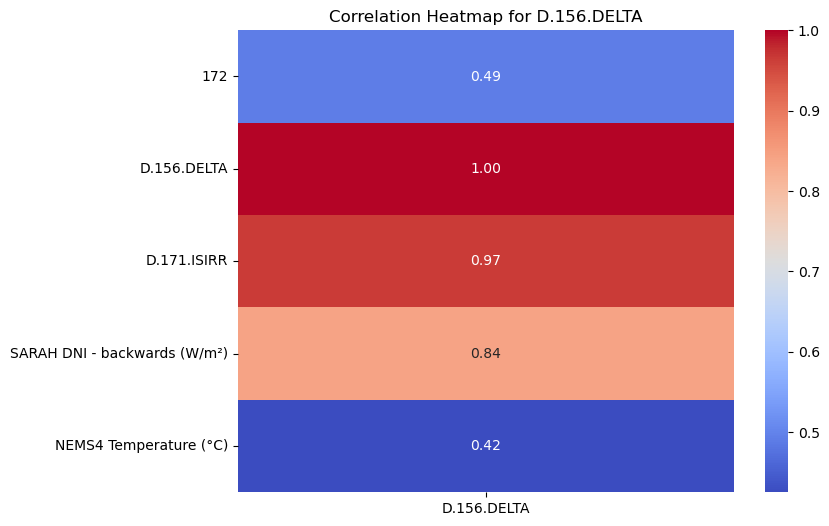

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = final_combined_df.corr()

# Extract correlations with "D.156.DELTA"
corr_with_delta = corr_matrix[["D.156.DELTA"]]

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_with_delta, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap for D.156.DELTA")
plt.show()

In [102]:
final_combined_df

,172,D.156.DELTA,D.171.ISIRR,SARAH DNI - backwards (W/m²),NEMS4 Temperature (°C)
2022-03-18 07:00:00,3.226,440.0,675.620,NaN,1.061834
2022-03-18 08:00:00,4.607,3344.0,836.143,763.0,2.361834
2022-03-18 09:00:00,5.690,3572.0,939.744,795.0,2.931834
2022-03-18 10:00:00,6.827,3452.0,972.460,817.0,3.461834
2022-03-18 11:00:00,7.632,3040.0,792.876,818.0,3.021834
...,...,...,...,...,...
2025-06-20 20:00:00+00:00,NaN,NaN,NaN,210.47,23.76
2025-06-20 21:00:00+00:00,NaN,NaN,NaN,78.13,21.47
2025-06-20 22:00:00+00:00,NaN,NaN,NaN,0.0,19.12
2025-06-20 23:00:00+00:00,NaN,NaN,NaN,0.0,17.32


In [104]:
# Rename columns in final_combined_df
final_combined_df = final_combined_df.rename(columns={
    "SARAH DNI - backwards (W/m²)": "dni_backwards",
    "NEMS4 Temperature (°C)": "temperature"
})

# Display the updated DataFrame
print("Updated Final Combined DataFrame with Renamed Columns:")
print(final_combined_df.head())

Updated Final Combined DataFrame with Renamed Columns:
                       172  D.156.DELTA  D.171.ISIRR dni_backwards temperature
2022-03-18 07:00:00  3.226        440.0      675.620           NaN    1.061834
2022-03-18 08:00:00  4.607       3344.0      836.143         763.0    2.361834
2022-03-18 09:00:00  5.690       3572.0      939.744         795.0    2.931834
2022-03-18 10:00:00  6.827       3452.0      972.460         817.0    3.461834
2022-03-18 11:00:00  7.632       3040.0      792.876         818.0    3.021834


In [107]:
final_combined_df.tail(100)

,172,D.156.DELTA,D.171.ISIRR,dni_backwards,temperature
2025-06-16 21:00:00+00:00,NaN,NaN,NaN,126.16,25.37
2025-06-16 22:00:00+00:00,NaN,NaN,NaN,0.0,23.4
2025-06-16 23:00:00+00:00,NaN,NaN,NaN,0.0,21.83
2025-06-17 00:00:00+00:00,NaN,NaN,NaN,0.0,20.7
2025-06-17 01:00:00+00:00,NaN,NaN,NaN,0.0,19.5
...,...,...,...,...,...
2025-06-20 20:00:00+00:00,NaN,NaN,NaN,210.47,23.76
2025-06-20 21:00:00+00:00,NaN,NaN,NaN,78.13,21.47
2025-06-20 22:00:00+00:00,NaN,NaN,NaN,0.0,19.12
2025-06-20 23:00:00+00:00,NaN,NaN,NaN,0.0,17.32


In [103]:
import requests
import pandas as pd

# Define the API endpoint and parameters
url = "https://my.meteoblue.com/packages/basic-1h_solar-1h"
params = {
    "apikey": "BxCsIi1U6N8SoM3w",  # Your API key
    "lat": 44.791225,             # Latitude
    "lon": 27.50663,              # Longitude
    "format": "json",              # Response format
    "forecast_days": 2,           # Number of forecast days
    "history_days": 4  
}

# Make the API call
response = requests.get(url, params=params)

# Check the response status
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()
    
    # Extract relevant data into a DataFrame
    if "data_1h" in data and "time" in data["data_1h"]:
        # Create a DataFrame with UTC time and required variables
        df_solar = pd.DataFrame({
            "time_utc": pd.to_datetime(data["data_1h"]["time"], utc=True),  # Convert directly to datetime
            "temperature": data["data_1h"].get("temperature", []),  # Extract temperature
            "dni_backwards": data["data_1h"].get("dni_backwards", [])  # Extract DNI backwards
        })
        
        # Set time_utc as the index
        df_solar.set_index("time_utc", inplace=True)
        
        # Display the DataFrame
        print("Solar DataFrame:")
        print(df_solar.head())
    else:
        print("Required data fields are missing in the response.")
else:
    print(f"Failed to fetch data. HTTP Status Code: {response.status_code}")
    print(f"Response: {response.text}")

Solar DataFrame:
                           temperature  dni_backwards
time_utc                                             
2025-06-16 00:00:00+00:00        18.53            0.0
2025-06-16 01:00:00+00:00        17.83            0.0
2025-06-16 02:00:00+00:00        16.95            0.0
2025-06-16 03:00:00+00:00        15.69            0.0
2025-06-16 04:00:00+00:00        14.44            0.0


In [92]:
import pandas as pd

# Define the next timestamps (e.g., from df_solar)
new_rows = df_solar[["dni_backwards", "temperature"]].copy()

# Ensure the new rows align with the future timestamps
new_rows.index = pd.to_datetime(new_rows.index)  # Ensure datetime index

# Create a DataFrame with NaN for all columns in final_combined_df
nan_rows = pd.DataFrame(index=new_rows.index, columns=final_combined_df.columns)

# Populate only the SARAH DNI - backwards (W/m²) and NEMS4 Temperature (°C) columns
nan_rows["SARAH DNI - backwards (W/m²)"] = new_rows["dni_backwards"]
nan_rows["NEMS4 Temperature (°C)"] = new_rows["temperature"]

# Append the new rows to final_combined_df
final_combined_df = pd.concat([final_combined_df, nan_rows])

# Display the updated DataFrame
print("Updated Final Combined DataFrame:")
print(final_combined_df.tail(130))

Updated Final Combined DataFrame:
                           172  D.156.DELTA  D.171.ISIRR  \
2025-06-15 15:00:00+00:00  NaN          NaN          NaN   
2025-06-15 16:00:00+00:00  NaN          NaN          NaN   
2025-06-15 17:00:00+00:00  NaN          NaN          NaN   
2025-06-15 18:00:00+00:00  NaN          NaN          NaN   
2025-06-15 19:00:00+00:00  NaN          NaN          NaN   
...                        ...          ...          ...   
2025-06-20 20:00:00+00:00  NaN          NaN          NaN   
2025-06-20 21:00:00+00:00  NaN          NaN          NaN   
2025-06-20 22:00:00+00:00  NaN          NaN          NaN   
2025-06-20 23:00:00+00:00  NaN          NaN          NaN   
2025-06-21 00:00:00+00:00  NaN          NaN          NaN   

                          SARAH DNI - backwards (W/m²) NEMS4 Temperature (°C)  
2025-06-15 15:00:00+00:00                       612.29                  25.03  
2025-06-15 16:00:00+00:00                        603.6                   25.6  
2025-

/var/folders/f5/zvp8h0wn4d50th4gw1czk38m0000gn/T/ipykernel_43600/288184924.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_combined_df = pd.concat([final_combined_df, nan_rows])


In [123]:
df

,172,D.156.DELTA,D.171.ISIRR
2022-03-18 07:00:00,3.226,440.0,675.620
2022-03-18 08:00:00,4.607,3344.0,836.143
2022-03-18 09:00:00,5.690,3572.0,939.744
2022-03-18 10:00:00,6.827,3452.0,972.460
2022-03-18 11:00:00,7.632,3040.0,792.876
...,...,...,...
2025-06-19 19:00:00,24.262,0.0,2.518
2025-06-19 20:00:00,23.412,0.0,2.519
2025-06-19 21:00:00,24.381,0.0,2.536
2025-06-19 22:00:00,24.989,0.0,2.561


In [137]:
import requests
import pandas as pd

# Define the API endpoint and parameters
url = "https://my.meteoblue.com/packages/basic-1h_solar-1h"
params = {
    "apikey": "BxCsIi1U6N8SoM3w",  # Your API key
    "lat": 44.791225,             # Latitude
    "lon": 27.50663,              # Longitude
    "format": "json",              # Response format
    "forecast_days": 2,           # Number of forecast days
    "history_days": 1  
}

# Make the API call
response = requests.get(url, params=params)

# Check the response status
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()
     
    # Extract relevant data into a DataFrame
    if "data_1h" in data and "time" in data["data_1h"]:
        # Create a DataFrame with UTC time and required variables
        df_solar = pd.DataFrame({
            "time_utc": pd.to_datetime(data["data_1h"]["time"], utc=True),  # Convert directly to datetime
            "temperature": data["data_1h"].get("temperature", []),  # Extract temperature
            "dni_backwards": data["data_1h"].get("dni_backwards", [])  # Extract DNI backwards
        })
        
        # Set time_utc as the index
        df_solar.set_index("time_utc", inplace=True)
        
        # Display the DataFrame
        print("Solar DataFrame:")
        print(df_solar.head())
    else:
        print("Required data fields are missing in the response.")
else:
    print(f"Failed to fetch data. HTTP Status Code: {response.status_code}")
    print(f"Response: {response.text}")

Solar DataFrame:
                           temperature  dni_backwards
time_utc                                             
2025-06-19 00:00:00+00:00        19.70            0.0
2025-06-19 01:00:00+00:00        20.10            0.0
2025-06-19 02:00:00+00:00        20.30            0.0
2025-06-19 03:00:00+00:00        20.23            0.0
2025-06-19 04:00:00+00:00        19.47            0.0


In [134]:
df

,172,D.156.DELTA,D.171.ISIRR
2022-03-18 07:00:00,3.226,440.0,675.620
2022-03-18 08:00:00,4.607,3344.0,836.143
2022-03-18 09:00:00,5.690,3572.0,939.744
2022-03-18 10:00:00,6.827,3452.0,972.460
2022-03-18 11:00:00,7.632,3040.0,792.876
...,...,...,...
2025-06-19 19:00:00,24.262,0.0,2.518
2025-06-19 20:00:00,23.412,0.0,2.519
2025-06-19 21:00:00,24.381,0.0,2.536
2025-06-19 22:00:00,24.989,0.0,2.561


In [138]:
# Restructure the index format and remove the name of the index for df_solar
df_solar.index = df_solar.index.strftime("%Y-%m-%d %H:%M:%S")  # Format the index
df_solar.index.name = None  # Remove the name of the index
# Rename columns in df_solar
df_solar = df_solar.rename(columns={
    "temperature": "172",
    "dni_backwards": "D.171.ISIRR"
})

# Display the updated DataFrame
print("Updated df_solar:")
print(df_solar.head())

Updated df_solar:
                       172  D.171.ISIRR
2025-06-19 00:00:00  19.70          0.0
2025-06-19 01:00:00  20.10          0.0
2025-06-19 02:00:00  20.30          0.0
2025-06-19 03:00:00  20.23          0.0
2025-06-19 04:00:00  19.47          0.0


In [147]:
import pandas as pd

# Ensure both DataFrames have the same column structure
df_solar = df_solar.reindex(columns=df.columns, fill_value=None)  # Match columns of df_solar to df

# Concatenate the DataFrames along the rows
df_combined = pd.concat([df, df_solar], axis=0)

# Display the updated DataFrame
print("Concatenated DataFrame:")
print(df_combined.tail(80))

Concatenated DataFrame:
                        172  D.156.DELTA  D.171.ISIRR
2025-06-19 17:00:00  33.554         28.0       24.184
2025-06-19 18:00:00  27.401          0.0        2.548
2025-06-19 19:00:00  24.262          0.0        2.518
2025-06-19 20:00:00  23.412          0.0        2.519
2025-06-19 21:00:00  24.381          0.0        2.536
...                     ...          ...          ...
2025-06-21 20:00:00  23.720          NaN      369.350
2025-06-21 21:00:00  21.910          NaN      168.930
2025-06-21 22:00:00  19.960          NaN        0.000
2025-06-21 23:00:00  18.370          NaN        0.000
2025-06-22 00:00:00  17.370          NaN        0.000

[80 rows x 3 columns]


In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ensure the index is in datetime format
df_combined.index = pd.to_datetime(df_combined.index)

# Define the target variable and exogenous variables
target_variable = "D.156.DELTA"
exogenous_variables = ["172", "D.171.ISIRR"]

# Prepare the data
y = df_combined[target_variable]  # Target variable
X = df_combined[exogenous_variables]  # Exogenous variables

# Handle missing values (fill or drop)
y = y.fillna(0)  # Replace NaN in target variable with 0
X = X.fillna(0)  # Replace NaN in exogenous variables with 0

# Fit the SARIMAX model
sarimax_model = SARIMAX(
    y,
    exog=X,
    order=(1, 1, 1),  # ARIMA order (p, d, q)
    seasonal_order=(1, 1, 1, 24)  # Seasonal order (P, D, Q, s) for daily seasonality
)
sarimax_result = sarimax_model.fit()

# Prepare exogenous variables for the next 24 hours (2025-06-20)
next_24_hours_index = pd.date_range(start="2025-06-20 00:00:00", periods=24, freq="h")  # Next 24 hours timestamps
last_172 = df_combined.loc["2025-06-19 23:00:00", "172"]
last_D171_ISIRR = df_combined.loc["2025-06-19 23:00:00", "D.171.ISIRR"]

# Extract scalar values if they are Series
if isinstance(last_172, pd.Series):
    last_172 = last_172.item()
if isinstance(last_D171_ISIRR, pd.Series):
    last_D171_ISIRR = last_D171_ISIRR.item()

next_24_hours_exog = pd.DataFrame({
    "172": [last_172] * 24,  # Use the last available value for "172"
    "D.171.ISIRR": [last_D171_ISIRR] * 24  # Use the last available value for "D.171.ISIRR"
}, index=next_24_hours_index)

# Ensure the exogenous variables match the model's requirements
next_24_hours_exog = next_24_hours_exog.astype(float)  # Ensure numeric types

# Forecast the next 24 hours
next_24_hours_forecast = sarimax_result.get_forecast(steps=24, exog=next_24_hours_exog)

# Extract the predicted mean values
forecasted_values = next_24_hours_forecast.predicted_mean

# Display the forecast
print("Next 24 Hours Forecast for D.156.DELTA:")
print(forecasted_values)

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.90689D+00    |proj g|=  6.55450D-02


 This problem is unconstrained.



At iterate    5    f=  6.85266D+00    |proj g|=  2.72970D-02

At iterate   10    f=  6.84780D+00    |proj g|=  8.47060D-03

At iterate   15    f=  6.84198D+00    |proj g|=  4.91606D-03

At iterate   20    f=  6.83490D+00    |proj g|=  5.26501D-02

At iterate   25    f=  6.77276D+00    |proj g|=  7.15509D-03

At iterate   30    f=  6.76752D+00    |proj g|=  1.47905D-03

At iterate   35    f=  6.76715D+00    |proj g|=  7.34629D-04

At iterate   40    f=  6.76638D+00    |proj g|=  9.54615D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f=  6.76620D+00    |proj g|=  6.86670D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     46     77      2     0     0   5.311D-05   6.766D+00
  F =   6.7661973509877864     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
